In [15]:
# Import Libraries

import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd

from tabulate import tabulate
from toolbox.datasets.sysId_data_loader import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


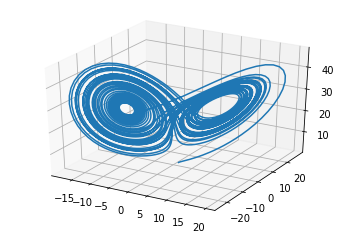

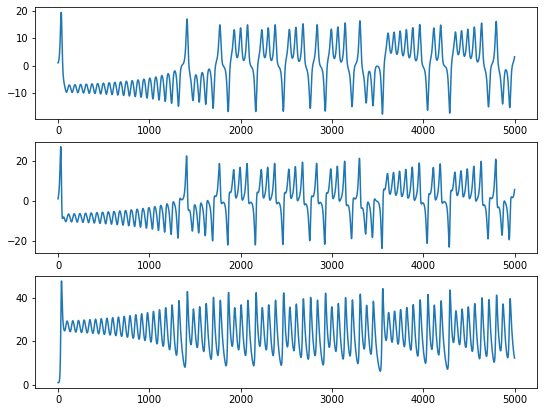

In [16]:
# Lorentz Sample

lorenz = LorenzSys(0.0, 50, 0.01)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(lorenz.states[:, 0], lorenz.states[:, 1], lorenz.states[:, 2])

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(lorenz.states[:, 0])
axs[1].plot(lorenz.states[:, 1])
axs[2].plot(lorenz.states[:, 2])


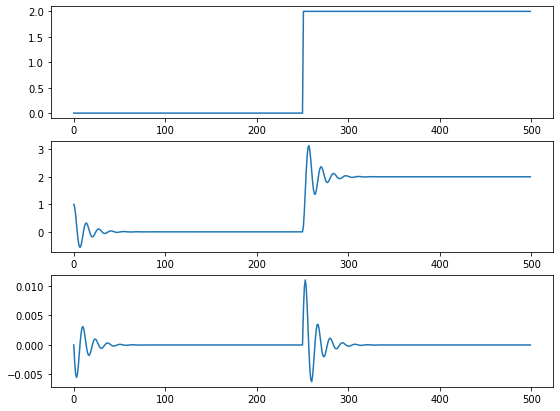

In [17]:
# RLC Sample (Batch)

t = np.arange(0.0, 0.5, 0.001)

u = np.zeros(len(t))
for i in range(len(u)):
    if i > 250:
        u[i] = 2

rlc = RlcSys(t,state_0=[1.0,0.0])

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(u)
axs[1].plot(rlc.states[:, 0])
axs[2].plot(rlc.states[:, 1])

<class 'tuple'>
True


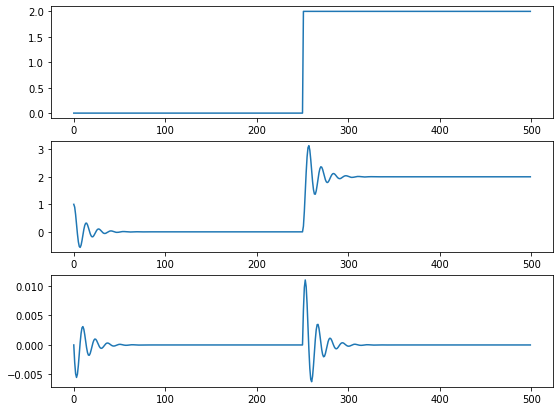

In [18]:
# RLC Sample (Recursive)

# Time Vector
t = np.arange(0.0, 0.5, 0.001)

# Input Vector
u = np.zeros(len(t))
for i in range(len(u)):
    if i > 250:
        u[i] = 2

# Return tuple with two signals: Output Voltage and Current
rlc = RlcSys2(t,u,state_0=[1.0,0.0])

# See Output Voltage and Current
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(u)
axs[1].plot(rlc.states[0])
axs[2].plot(rlc.states[1])

# Verify if it is tuple
print(type(rlc.states))
print(isinstance(rlc.states, tuple))

In [19]:
# Export to csv

def to_fwf(df, fname):
    content = tabulate(df.values.tolist(), list(df.columns), tablefmt="plain")
    open(fname, "w").write(content)

to_fwf(pd.DataFrame(u),'entrada.csv')
to_fwf(pd.DataFrame(rlc.states[0]),'tensao.csv')
to_fwf(pd.DataFrame(rlc.states[1]),'corrente.csv')

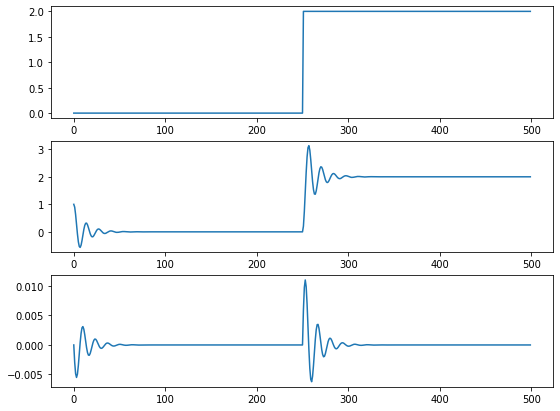

In [20]:
# Import from csv

entrada = pd.read_fwf('entrada.csv')
tensao = pd.read_fwf('tensao.csv')
corrente = pd.read_fwf('corrente.csv')

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(entrada)
axs[1].plot(tensao)
axs[2].plot(corrente)

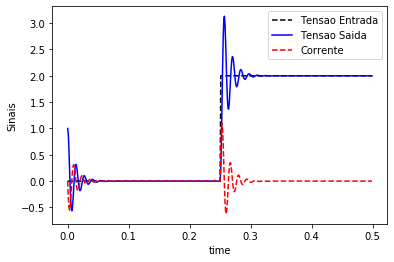

In [21]:
# Plot results at the same Figure

plt.plot(t,entrada'k--',label='Tensao Entrada')
plt.plot(t,tensao,'b-',label='Tensao Saida')
plt.plot(t,100*corrente,'r--',label='Corrente')
plt.ylabel('Sinais')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()